# Baselines

Notebook to run baselines and document results. Implementation of baselines can be found in baselines.py.

In [75]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


from baselines import *
from utils import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
 print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [51]:
hoc_num = 18
train_accs, test_accs = [], []
minlens = range(1,6)
for minlen in minlens: 
    train_acc, test_acc = baseline_pathscore(hoc_num, minlen=minlen)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

Success rate: 0.875932733098
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 1
    Number of samples in dataset: 190703
    Test size: 0.1
    Train acc: 0.877534492402	 Test acc: 0.882072256305


Success rate: 0.791943976411
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 2
    Number of samples in dataset: 94960
    Test size: 0.1
    Train acc: 0.795598146588	 Test acc: 0.797809604044


Success rate: 0.738101222079
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 3
    Number of samples in dataset: 63662
    Test size: 0.1
    Train acc: 0.744113797015	 Test acc: 0.745405999686


Success rate: 0.703604189844
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 4
    Number of samples in dataset: 47639
    Test size: 0.1
    Train acc: 0.712839650146	 Test acc: 0.698782535684


Success rat

In [17]:
minlens, train_accs, test_accs = np.array(minlens).reshape(-1,1), np.array(train_accs).reshape(-1,1), np.array(test_accs).reshape(-1,1)


(5, 2)


In [68]:
print train_accs

[0.87753449240234926, 0.79559814658803707, 0.74411379701544633, 0.71283965014577255, 0.68773782484292501]


In [69]:
print test_accs

[0.88207225630538511, 0.79780960404380796, 0.74540599968588028, 0.69878253568429893, 0.68516060525617206]


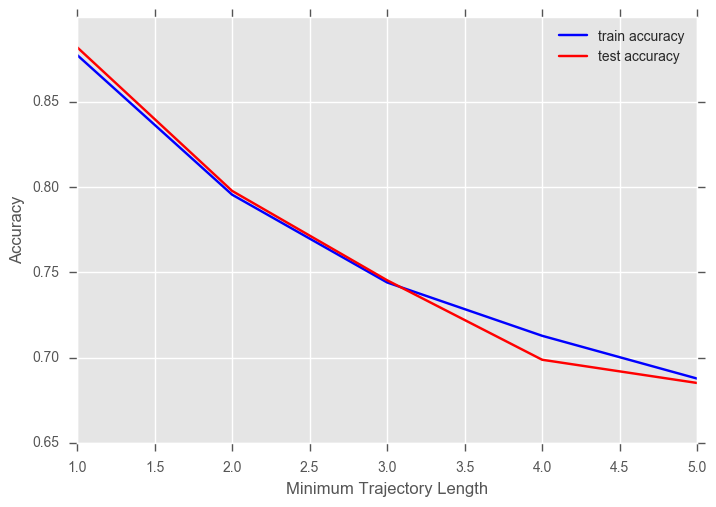

In [43]:

plt.plot(minlens, train_accs, 'b', label="train accuracy")
plt.plot(minlens, test_accs, 'r', label="test accuracy")
plt.legend(loc="upper right")
plt.xlabel('Minimum Trajectory Length')
plt.ylabel('Accuracy')
plt.show()

In [47]:
x, y = load_data_will_student_solve_next_problem_baseline(hoc_num, minlen=1)

Loading data...
Data loaded.


In [55]:
x_ = list(x)
print len(x_)

190703


In [56]:
x_0, x_1 = [], []
for i in xrange(len(x_)):
    if y[i] == 0:
        x_0.append(x_[i])
    else:
        x_1.append(x_[i])

In [57]:
print len(x_0)

23660


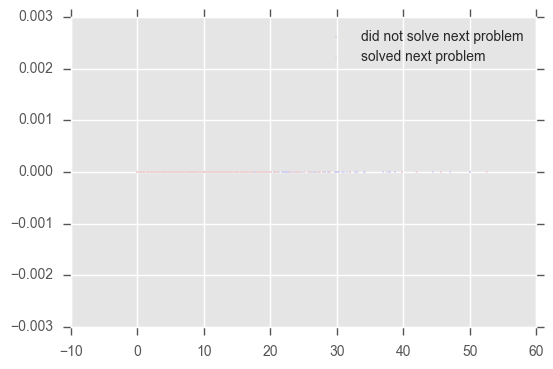

In [65]:
plt.scatter(x_0, [0 for i in xrange(len(x_0))], train_accs, 'b', label="did not solve next problem")
plt.scatter(x_1, [0 for i in xrange(len(x_1))], train_accs, 'r', label="solved next problem")

plt.legend(loc="upper right")
# plt.xlabel('Minimum Trajectory Length')
# plt.ylabel('Accuracy')
plt.show()

In [66]:
print np.average(x_0)

1.08368977386


In [67]:
print np.average(x_1)

0.133984389642


In [61]:
traj_to_score_map = get_traj_to_score_map(hoc_num)

In [63]:
print traj_to_score_map.items()[:20] 

[(0, 3.5464639980707238e-06), (1, 3.367057533678623e-05), (2, 0.00010432968179447053), (3, 2.244265900623906e-05), (4, 2.802866543762417e-05), (5, 3.787769168277273e-05), (6, 2.5989123004309786e-05), (7, 3.5757770166535856e-05), (8, 7.220891936747474e-05), (9, 4.442116402832746e-05), (10, 0.00021767889485161196), (11, 0.00022451026999327478), (12, 6.0239971606089296e-05), (13, 2.552496902015912e-05), (14, 7.51591824168619e-05), (15, 9.172988551482558e-05), (16, 2.5972514097866648e-05), (17, 5.0007170459712566e-05), (18, 4.488531801247812e-05), (19, 4.4868709106034983e-05)]


In [64]:
print traj_to_score_map.items()[-20:]

[(83935, 3.597552164668755), (83936, 0.271451355661882), (83937, 3.003160688651283), (83938, 2.0209221657704286), (83939, 0.0018644977357744142), (83940, 0.0003960106320019448), (83941, 3.010791676010866), (83942, 0.0025769392967146276), (83943, 0.0013934576764304393), (83944, 0.001625238351521443), (83945, 1.5490166255332989), (83946, 0.005089058524173028), (83947, 0.34641216405859293), (83948, 0.004127400543528831), (83949, 3.0598902940261596), (83950, 0.00420233968615416), (83951, 6.001773621907216), (83952, 2.2706249244285157), (83953, 0.004379746372429721), (83954, 2.0000475034740424)]


In [ ]:
## using logistic regression model

In [4]:
hoc_num = 18
minlen = 3
train_acc, test_acc = baseline_pathscore(hoc_num, minlen=minlen, use_pathscore_only=False, model='log_reg')

x shape: (63662, 2)
Success rate: 0.738101222079
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 3
    Number of samples in dataset: 63662
    Test size: 0.1
    Train acc: 0.790749629112	 Test acc: 0.792366891786




In [ ]:
using svm 

In [5]:
hoc_num = 18
minlen = 3
train_acc, test_acc = baseline_pathscore(hoc_num, minlen=minlen, use_pathscore_only=False, model='svm')

x shape: (63662, 2)
Success rate: 0.738101222079
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 3
    Number of samples in dataset: 63662
    Test size: 0.1
    Train acc: 0.803804869535	 Test acc: 0.806031097848




In [6]:
hoc_num = 18
train_accs, test_accs = [], []
minlens = range(1,6)
for minlen in minlens: 
    train_acc, test_acc = baseline_pathscore(hoc_num, minlen=minlen, use_pathscore_only=False, model='log_reg')
    train_accs.append(train_acc)
    test_accs.append(test_acc)

x shape: (190703, 2)
Success rate: 0.875932733098
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 1
    Number of samples in dataset: 190703
    Test size: 0.1
    Train acc: 0.883873636618	 Test acc: 0.88710607729


x shape: (94960, 2)
Success rate: 0.791943976411
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 2
    Number of samples in dataset: 94960
    Test size: 0.1
    Train acc: 0.820544322756	 Test acc: 0.814553496209


x shape: (63662, 2)
Success rate: 0.738101222079
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 3
    Number of samples in dataset: 63662
    Test size: 0.1
    Train acc: 0.790749629112	 Test acc: 0.792366891786


x shape: (47639, 2)
Success rate: 0.703604189844
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 4
    Number of samples in dataset: 47639
    Test

In [7]:
print train_accs
print test_accs

[0.8838736366178801, 0.82054432275578026, 0.79074962911248803, 0.78122448979591841, 0.7767617474410784]
[0.88710607729012636, 0.81455349620893003, 0.79236689178577036, 0.77896725440806047, 0.76745420759224847]


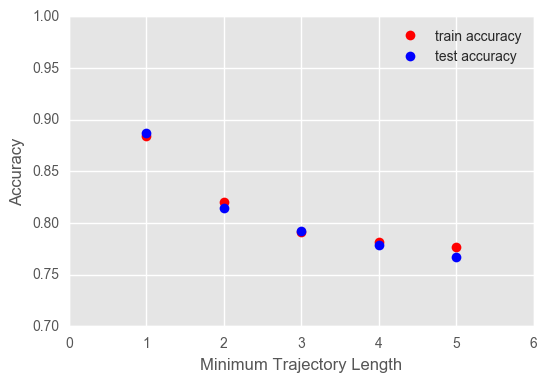

In [11]:
plt.plot(minlens, train_accs, 'ro', label="train accuracy")
plt.plot(minlens, test_accs, 'bo', label="test accuracy")
plt.legend(loc="upper right")
plt.xlabel('Minimum Trajectory Length')
plt.ylabel('Accuracy')
plt.axis([0, 6, 0.7, 1.0])
plt.show()

In [5]:
hoc_num = 18
min_train_accs, min_test_accs, avg_train_accs, avg_test_accs, max_train_accs, max_test_accs, n_samples_list = [], [], []
for only_traj_len in range(1, 11):
    train_accs, test_accs, n_samples = baseline_pathscore_traj_len(hoc_num, only_traj_len=only_traj_len, test_size=0.1, model='log_reg')
    min_train_accs.append(min(train_accs))
    min_test_accs.append(min(test_accs))
    min_train_accs.append(sum(train_accs)/float(len(train_accs)))
    min_test_accs.append(sum(test_accs)/float(len(train_accs)))
    max_train_accs.append(max(train_accs))
    max_test_accs.append(max(test_accs))
    n_samples_list.append(n_samples)

x shape: (95743, 2)
Success rate: 0.959234617674
Baseline logistic regression on path scores:

    Only including trajectories with length: 1
    Number of samples in dataset: 95743
    Test size: 0.1
    Train acc: 0.95941648872	 Test acc: 0.957597911227


x shape: (31298, 2)
Success rate: 0.901463352291
Baseline logistic regression on path scores:

    Only including trajectories with length: 2
    Number of samples in dataset: 31298
    Test size: 0.1
    Train acc: 0.90116444192	 Test acc: 0.904153354633


x shape: (16023, 2)
Success rate: 0.840666541846
Baseline logistic regression on path scores:

    Only including trajectories with length: 3
    Number of samples in dataset: 16023
    Test size: 0.1
    Train acc: 0.838280166436	 Test acc: 0.829694323144


x shape: (9971, 2)
Success rate: 0.801725002507
Baseline logistic regression on path scores:

    Only including trajectories with length: 4
    Number of samples in dataset: 9971
    Test size: 0.1
    Train acc: 0.815557784

In [6]:
print n_samples_list

[95743, 31298, 16023, 9971, 7063, 5305, 4201, 3235, 2668, 2116]


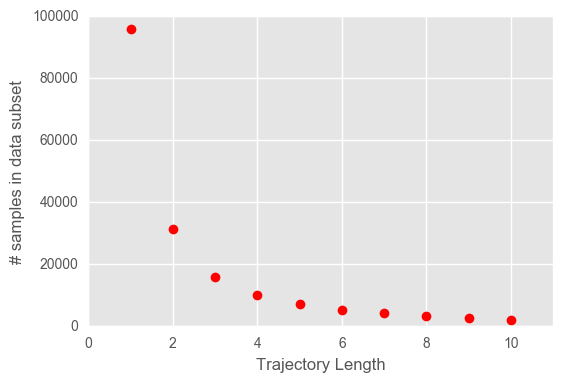

In [14]:
plt.plot(range(1, 11), n_samples_list, 'ro')
plt.xlabel('Trajectory Length')
plt.ylabel('# samples in data subset')
plt.axis([0, 11, 0, 100000])
plt.show()

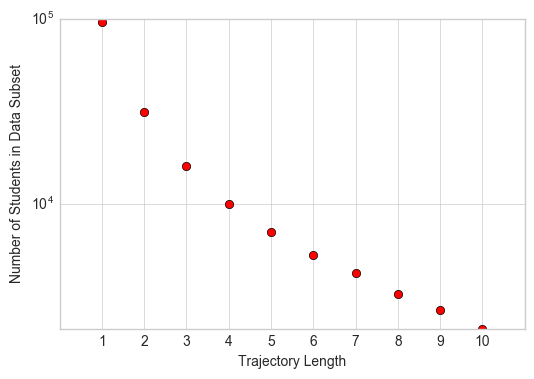

In [74]:
plt.plot(range(1, 11), n_samples_list, 'ro')
plt.xlabel('Trajectory Length')
plt.ylabel('Number of Students in Data Subset')
# plt.axis([0, 11, 0, 100000])
plt.xticks(range(1,11))
plt.yscale('log')
plt.yticks([1000, ])
# plt.axis([0, 11, 0, 100000])
plt.show()

In [59]:
print n_samples_list


[95743, 31298, 16023, 9971, 7063, 5305, 4201, 3235, 2668, 2116]


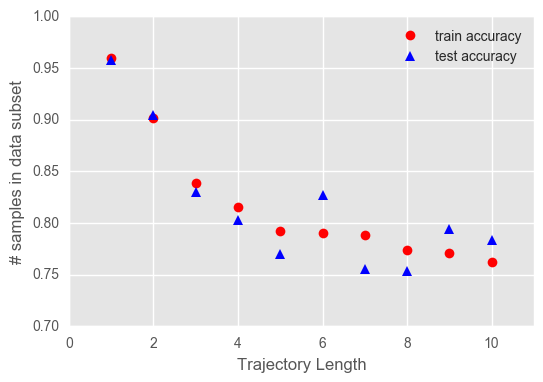

In [17]:
plt.plot(range(1,11), train_accs, 'ro', label="train accuracy")
plt.plot(range(1,11), test_accs, 'b^', label="test accuracy")
plt.xlabel('Trajectory Length')
plt.ylabel('# samples in data subset')
plt.legend(loc="upper right")


plt.axis([0, 11, 0.7, 1])
plt.show()

In [ ]:
print train_accs

In [18]:
print test_accs

[0.9575979112271541, 0.90415335463258784, 0.82969432314410485, 0.80260521042084165, 0.76944837340876948, 0.82674199623352163, 0.75534441805225649, 0.75308641975308643, 0.79400749063670417, 0.78301886792452835]


In [30]:
hoc_num = 18
min_train_accs, min_test_accs, avg_train_accs, avg_test_accs, max_train_accs, max_test_accs, n_samples_list = [], [], []
for only_traj_len in range(1, 11):
    train_accs, test_accs, n_samples = baseline_pathscore_traj_len(hoc_num, only_traj_len=only_traj_len, test_size=0.1, model='log_reg')
    min_train_accs.append(min(train_accs))
    min_test_accs.append(min(test_accs))
    min_train_accs.append(sum(train_accs)/float(len(train_accs)))
    min_test_accs.append(sum(test_accs)/float(len(train_accs)))
    max_train_accs.append(max(train_accs))
    max_test_accs.append(max(test_accs))
    n_samples_list.append(n_samples)

x shape: (95743, 2)
Success rate: 0.959234617674
Baseline logistic regression on path scores:

        Only including trajectories with length: 1
        Number of samples in dataset: 95743
        Test size: 0.1
        Train acc: 0.959161173521	 Test acc: 0.959895561358


Baseline logistic regression on path scores:

        Only including trajectories with length: 1
        Number of samples in dataset: 95743
        Test size: 0.1
        Train acc: 0.959230804939	 Test acc: 0.959268929504


Baseline logistic regression on path scores:

        Only including trajectories with length: 1
        Number of samples in dataset: 95743
        Test size: 0.1
        Train acc: 0.959590567264	 Test acc: 0.956031331593


Baseline logistic regression on path scores:

        Only including trajectories with length: 1
        Number of samples in dataset: 95743
        Test size: 0.1
        Train acc: 0.959288831121	 Test acc: 0.958746736292


Baseline logistic regression on path scores:

 

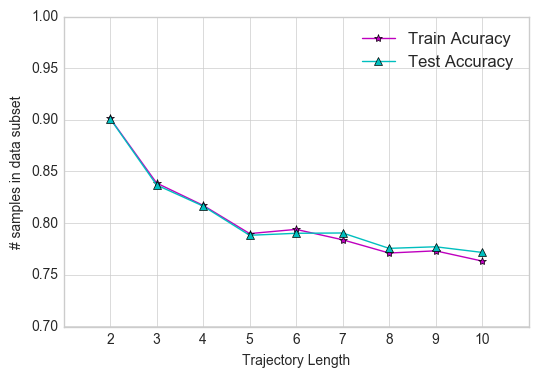

In [78]:
plt.plot(range(2,11), avg_train_accs[1:], '-m*', label="Train Acuracy")
plt.plot(range(2,11), avg_test_accs[1:], '-c^', label="Test Accuracy")
plt.xlabel('Trajectory Length')
plt.ylabel('# samples in data subset')
plt.legend(loc="upper right")
plt.xticks(range(2,11))
plt.axis([1, 11, 0.7, 1.0])

plt.show()

/Users/lisa1010/dev/dkt/venv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


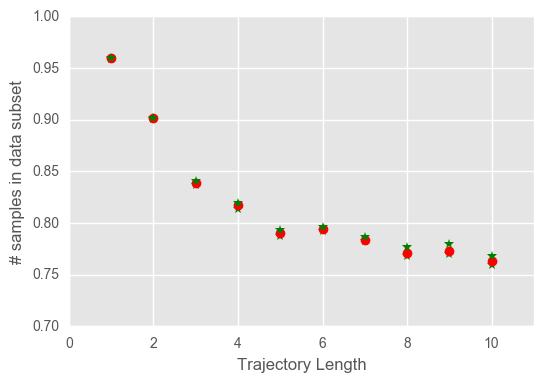

In [39]:
traj_lens = range(1, 11)

avg_train_accs = np.array(avg_train_accs)
min_train_accs = np.array(min_train_accs)
max_train_accs = np.array(max_train_accs)

lower_error = (avg_train_accs - min_train_accs)/avg_train_accs
upper_error = (max_train_accs - avg_train_accs )/avg_train_accs
asymmetric_error = [lower_error, upper_error]
# plt.errorbar(range(1,11), avg_train_accs, yerr=asymmetric_error, fmt='o', label="train accuracy")
# plt.plot(range(1,11), avg_train_accs, 'ro', )
plt.plot(traj_lens, min_train_accs, 'g*')
plt.plot(traj_lens, avg_train_accs, 'ro')
plt.plot(traj_lens, max_train_accs, 'g*')
plt.xlabel('Trajectory Length')
plt.ylabel('# samples in data subset')
plt.legend(loc="upper right")


plt.axis([0, 11, 0.7, 1])
plt.show()

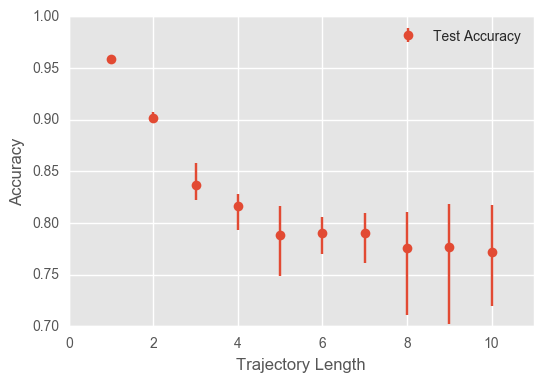

In [49]:
traj_lens = range(1, 11)

avg_test_accs = np.array(avg_test_accs)
min_test_accs = np.array(min_test_accs)
max_test_accs = np.array(max_test_accs)

lower_error = (avg_test_accs - min_test_accs)/avg_test_accs
upper_error = (max_test_accs - avg_test_accs )/avg_test_accs
asymmetric_error = [lower_error, upper_error]
plt.errorbar(range(1,11), avg_test_accs, yerr=asymmetric_error, fmt='o', label="Test Accuracy")
plt.xlabel('Trajectory Length')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")


plt.axis([0, 11, 0.7, 1])
plt.show()

In [47]:
print list(avg_test_accs)

[0.95876762402088767, 0.90118210862619819, 0.83693075483468493, 0.81653306613226451, 0.7882602545968882, 0.7902071563088513, 0.79049881235154396, 0.77561728395061713, 0.77715355805243447, 0.77169811320754722]


In [48]:
print list(avg_train_accs)

[0.9592865100733452, 0.90144845214427727, 0.83880721220527055, 0.81722946617630687, 0.78991504090623033, 0.79396732299958106, 0.7839153439153439, 0.77110958433527999, 0.77321949187838412, 0.76334033613445373]
